In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("./HW1_data.csv")

In [6]:
print(df)

            0       1    2
0      Daniel  Weight   72
1       Avery     Age   66
2      Joseph  Weight   70
3     Jackson      BP   97
4        Nora  Height  153
..        ...     ...  ...
271    Elijah      BP  137
272      Aria     Age   55
273  Penelope     Age   47
274     Chloe     Age   70
275  Benjamin     Age   39

[276 rows x 3 columns]


In [37]:
new_df = pd.DataFrame(columns = ["Name"]+list(set(df['1'])))
new_df['Name'] = list(set(df['0']))

print(new_df)


         Name  Sex Height  Age Weight   BP   HR
0       Avery  NaN    NaN  NaN    NaN  NaN  NaN
1     Jackson  NaN    NaN  NaN    NaN  NaN  NaN
2        Emma  NaN    NaN  NaN    NaN  NaN  NaN
3     Matthew  NaN    NaN  NaN    NaN  NaN  NaN
4     Madison  NaN    NaN  NaN    NaN  NaN  NaN
5        Liam  NaN    NaN  NaN    NaN  NaN  NaN
6       Grace  NaN    NaN  NaN    NaN  NaN  NaN
7       James  NaN    NaN  NaN    NaN  NaN  NaN
8    Victoria  NaN    NaN  NaN    NaN  NaN  NaN
9       Sofia  NaN    NaN  NaN    NaN  NaN  NaN
10      Lucas  NaN    NaN  NaN    NaN  NaN  NaN
11    Michael  NaN    NaN  NaN    NaN  NaN  NaN
12      Henry  NaN    NaN  NaN    NaN  NaN  NaN
13     Evelyn  NaN    NaN  NaN    NaN  NaN  NaN
14  Alexander  NaN    NaN  NaN    NaN  NaN  NaN
15      Aiden  NaN    NaN  NaN    NaN  NaN  NaN
16     Elijah  NaN    NaN  NaN    NaN  NaN  NaN
17     Camila  NaN    NaN  NaN    NaN  NaN  NaN
18       Mila  NaN    NaN  NaN    NaN  NaN  NaN
19      Ethan  NaN    NaN  NaN    NaN  N

In [53]:
name = "Sofia"
per_df = df[df['0'] == name].reset_index(drop=True)
print(per_df)

       0       1    2
0  Sofia     Age   58
1  Sofia  Weight   59
2  Sofia     Sex    F
3  Sofia      HR   79
4  Sofia      BP  131
5  Sofia  Height  171


In [56]:
name = "Mia"
for name in new_df['Name']:
    # getting each person's information
    per_df = df[df['0'] == name].reset_index(drop=True)
    num = new_df.index[new_df['Name'] == name]
    for ii in range(per_df.shape[0]):
        # print(ii)
        col_name = per_df['1'][ii]
        new_df.loc[num, col_name] = per_df['2'][ii]
print(new_df)

         Name Sex Height Age Weight   BP   HR
0       Avery   F    159  66     54  121   72
1     Jackson   M    170  46     64   97   81
2        Emma   F    159  35     64  137   61
3     Matthew   M    166  69     70  128   85
4     Madison   F    NaN  74    NaN  NaN   80
5        Liam   M    172  45     62  141   94
6       Grace   F    172  15     64  134   91
7       James   M    NaN  65    NaN  124   67
8    Victoria   F    NaN  62    NaN   96   65
9       Sofia   F    171  58     59  131   79
10      Lucas   M    171  39     64  148  NaN
11    Michael   M    163  13     65  NaN   79
12      Henry   M    179  70     63  130   81
13     Evelyn   F    168  60     60  106   67
14  Alexander   M    171  43     62  124   66
15      Aiden   M    166  38     69  136   93
16     Elijah   M    177  30     73  137   64
17     Camila   F    166  44     46  134  NaN
18       Mila   F    164  48     48  139  NaN
19      Ethan   M    167  12     61  103   86
20        Mia   F    171  60     6

In [121]:
data = new_df.fillna(0)
data = data.astype({
    "Height": int,
    "Age": int,
    "Weight": int,
    "BP": int,
    "HR": int

    })
avg = []
max_idx = []
for col in data.columns:
    if col == "Name" or col == "Sex":
        continue
    # print(col)
    # print(type(data[col][0]))
    valid_number = data.shape[0] - (data[col] == 0).sum()
    avg.append(data[col].sum()/valid_number)
    max_idx.append(data[col].idxmax())
# print(data.columns)
data.loc[len(data)] = ['AVG', 'N'] + avg
# print(['AVG'] + avg)
# print(data.iloc[49])
print("The person with Max value:")
for ii in range(5):
    col_name = data.columns[ii+2]
    print(f"{col_name}: {data['Name'][max_idx[ii]]}->{data[col_name][max_idx[ii]]} ")


The person with Max value:
Height: Mason->186.0 
Age: Madison->74.0 
Weight: Logan->76.0 
BP: Lucas->148.0 
HR: Liam->94.0 


In [116]:
print(data.head())

      Name Sex  Height   Age  Weight     BP    HR
0    Avery   F   159.0  66.0    54.0  121.0  72.0
1  Jackson   M   170.0  46.0    64.0   97.0  81.0
2     Emma   F   159.0  35.0    64.0  137.0  61.0
3  Matthew   M   166.0  69.0    70.0  128.0  85.0
4  Madison   F     0.0  74.0     0.0    0.0  80.0


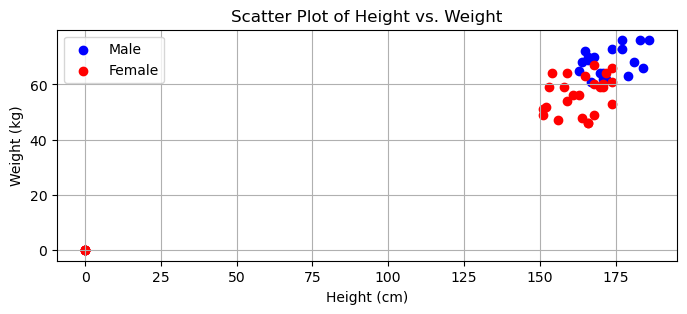

In [117]:
import matplotlib.pyplot as plt

df = data.copy()

# Separate data for males and females
male_data = df[df['Sex'] == 'M']
female_data = df[df['Sex'] == 'F']

# Create a scatter plot
plt.figure(figsize=(8, 3))
plt.scatter(male_data['Height'], male_data['Weight'], c='blue', label='Male')
plt.scatter(female_data['Height'], female_data['Weight'], c='red', label='Female')

# Labeling the plot
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
